In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = load_iris()
dataset = raw_data.data

In [3]:
d_scaler = MinMaxScaler()
dataset_scaled = d_scaler.fit_transform(dataset)

In [4]:
mds_output = MDS(3,random_state=5)
data_3d = mds_output.fit_transform(dataset_scaled)

In [5]:
mds_colors = ['purple','blue', 'yellow']



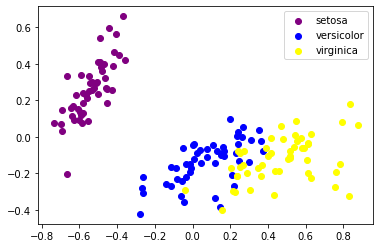

In [6]:
for i in np.unique(raw_data.target):
  d_subset = data_3d[raw_data.target == i]
  
  x = [row[0] for row in d_subset]
  y = [row[1] for row in d_subset]
  plt.scatter(x,y,c=mds_colors[i],label=raw_data.target_names[i])
plt.legend()
plt.show()

In [7]:
data_dummy_cities = {'A':[0,40,50,30,40],
          'B':[40,0,40,50,20],
          'C':[50,40,0,20,50],
          'D':[30,50,20,0,20],
          'E':[40,20,50,20,0],
          }

In [8]:
cities_dataframe = pd.DataFrame(data_dummy_cities, index =['A','B','C','D','E'])

In [9]:
cities_dataframe

,A,B,C,D,E
A,0,40,50,30,40
B,40,0,40,50,20
C,50,40,0,20,50
D,30,50,20,0,20
E,40,20,50,20,0


In [10]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(cities_dataframe)

In [11]:
MDS_stress = []


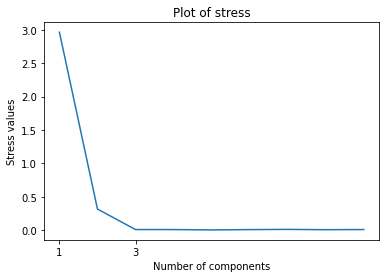

In [12]:
for i in range(1, 10):
    mds = MDS(n_components=i)
    pts = mds.fit_transform(df_scaled)
    MDS_stress.append(mds.stress_)


plt.plot(range(1, 10), MDS_stress)
plt.xticks(range(1, 5, 2))
plt.title('Plot of stress')
plt.xlabel('Number of components')
plt.ylabel('Stress values')
plt.show()

In [13]:
mds = MDS(n_components=3)
x = mds.fit_transform(df_scaled)


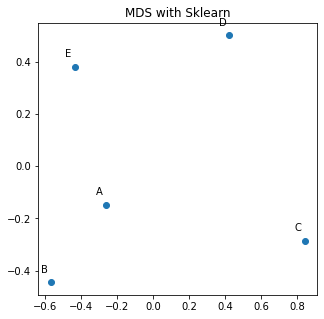

0.006651187122331157


In [14]:
cities = ['A','B','C','D','E']

plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1])
plt.title('MDS with Sklearn')
for label, x, y in zip(cities, x[:, 0], x[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.show()
print(mds.stress_)

# t-SNE

In [48]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

In [40]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target



In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
tsne = TSNE(n_components=2, verbose=1, random_state=5)
fitted_data = tsne.fit_transform(iris_data)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.932037
[t-SNE] KL divergence after 1000 iterations: 0.123070


[Text(0.5, 1.0, 'Iris data tSNE projection')]

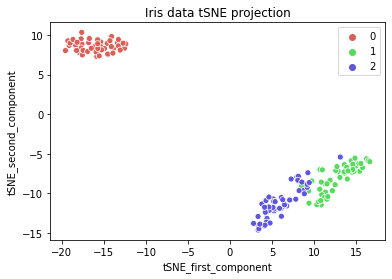

In [44]:
iris_df = pd.DataFrame()
iris_df["iris_target"] = iris_target
iris_df["tSNE_first_component"] = fitted_data[:,0]
iris_df["tSNE_second_component"] = fitted_data[:,1]

sns.scatterplot(x="tSNE_first_component", y="tSNE_second_component", hue=iris_df.iris_target.tolist(),
                palette=sns.color_palette("hls", 3),
                data=iris_df).set(title="Iris data tSNE projection")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.335091
[t-SNE] KL divergence after 1000 iterations: 1.425330


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

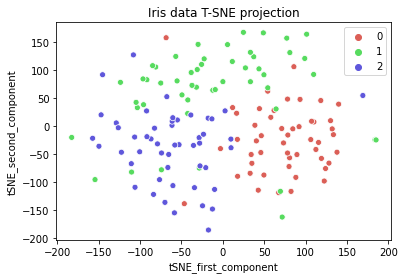

In [45]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

tsne = TSNE(n_components=3, verbose=1, random_state=5)
fitted_data = tsne.fit_transform(iris_data)
iris_df = pd.DataFrame()
iris_df["iris_target"] = iris_target
iris_df["tSNE_first_component"] = fitted_data[:,0]
iris_df["tSNE_second_component"] = fitted_data[:,1]

sns.scatterplot(x="tSNE_first_component", y="tSNE_second_component", hue=iris_df.iris_target.tolist(),
                palette=sns.color_palette("hls", 3),
                data=iris_df).set(title="Iris data T-SNE projection")

In [69]:
(digit, digit_label), (_ , _) = mnist.load_data()


In [70]:
digit = reshape(digit, [digit.shape[0], digit.shape[1]*digit.shape[2]])


In [71]:
tsne_MNIST = TSNE(n_components=2, verbose=1, random_state=5)


In [72]:
fitted_data = tsne_MNIST.fit_transform(digit)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.034s...
[t-SNE] Computed neighbors for 60000 samples in 101.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

In [73]:
mnist_df = pd.DataFrame()
mnist_df["digit_label"] = digit_label
mnist_df["tSNE_first_component"] = fitted_data[:,0]
mnist_df["tSNE_second_component"] = fitted_data[:,1]



[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

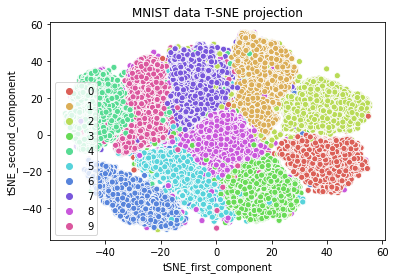

In [76]:
sns.scatterplot(x="tSNE_first_component", y="tSNE_second_component", hue=mnist_df.digit_label.tolist(),
                palette=sns.color_palette("hls", 10),
                data=mnist_df).set(title="MNIST data T-SNE projection")